____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__<br/>
__Topic: Final Assessment__
____

In [1]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

#Train test
from sklearn.model_selection import train_test_split

#sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets


#StandarScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#PCA
from sklearn.decomposition import PCA

#Kernell PCA
from sklearn.decomposition import KernelPCA

#TSNE
from sklearn.manifold import TSNE

#SVM
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

#Logistic Regression
from sklearn.linear_model import LogisticRegression


#Grid search
from sklearn.model_selection import GridSearchCV

#Autoencoder
from keras.layers import Input, Dense
from keras.models import Model


# Load dataset

In [2]:
# about the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
data = datasets.load_breast_cancer()

In [3]:
# get feature matrix and label vector
# get feature matrix
x = data.data
# get label vector
y = data.target

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


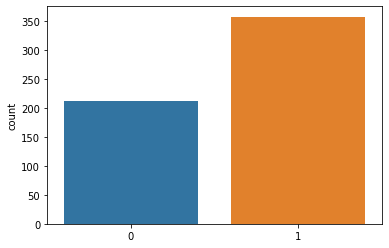

In [4]:
# visualize the label vector 
sns.countplot(y)
plt.show()

In [5]:
# get the shape of the X matrix
x.shape

(569, 30)

In [6]:
#make train-test-split (80% train , 20% test)

xtr, xte, ytr, yte = train_test_split(x,y, test_size = 0.2)

In [7]:
#Firt, we use standar scaler to optimize the results
#scaler = StandardScaler()
#xtr_sc = scaler.fit_transform(xtr)
#xte_sc = scaler.transform(xte)

scaler = MinMaxScaler()
scaler.fit(xtr)

xtr_sc = scaler.transform(xtr)
xte_sc = scaler.transform(xte)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


• The cumulative variance within the 2 components:  0.6972578347939066 



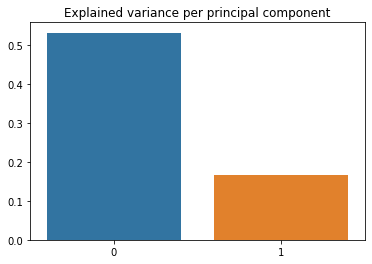

• The cumulative variance within the 4 components:  0.8361669823927322 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


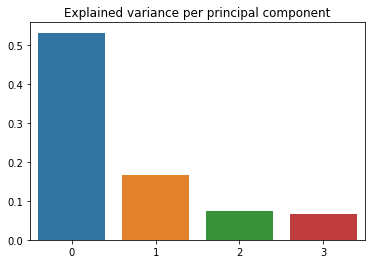

• The cumulative variance within the 6 components:  0.9090161486794125 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


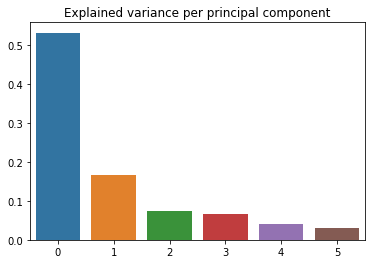

In [8]:
# within train set make dimension reduction with PCA and kPCA from D = x.shape[1] features to P = [2,4,6] latent dimensions.
pca_2 = PCA(n_components=2)
pca_2.fit(xtr_sc)
xtr_pca_2 = pca_2.transform(xtr_sc)
xte_pca_2 = pca_2.transform(xte_sc)

pca_4 = PCA(n_components=4)
pca_4.fit(xtr_sc)
xtr_pca_4 = pca_4.transform(xtr_sc)
xte_pca_4 = pca_4.transform(xte_sc)

pca_6 = PCA(n_components=6)
pca_6.fit(xtr_sc)
xtr_pca_6 = pca_6.transform(xtr_sc)
xte_pca_6 = pca_6.transform(xte_sc)


# check the cumulative variance within the preserved components
print(f'• The cumulative variance within the 2 components:  {np.sum(pca_2.explained_variance_ratio_)} \n') 
sns.barplot(np.arange(0,2),pca_2.explained_variance_ratio_)
plt.title('Explained variance per principal component')
plt.show()

print(f'• The cumulative variance within the 4 components:  {np.sum(pca_4.explained_variance_ratio_)} \n') 
sns.barplot(np.arange(0,4),pca_4.explained_variance_ratio_)
plt.title('Explained variance per principal component')
plt.show()

print(f'• The cumulative variance within the 6 components:  {np.sum(pca_6.explained_variance_ratio_)} \n') 
sns.barplot(np.arange(0,6),pca_6.explained_variance_ratio_)
plt.title('Explained variance per principal component')
plt.show()

In [9]:
#Make dimension reduction with kPCA

kpca_2 = KernelPCA(n_components=2, kernel='rbf',gamma= 0.05)
kpca_2.fit(xtr_sc)
xtr_kpca_2 = kpca_2.transform(xtr_sc)
xte_kpca_2 = kpca_2.transform(xte_sc)

kpca_4 = KernelPCA(n_components=4, kernel='rbf',gamma= 0.05)
kpca_4.fit(xtr_sc)
xtr_kpca_4 = kpca_4.transform(xtr_sc)
xte_kpca_4 = kpca_4.transform(xte_sc)

kpca_6 = KernelPCA(n_components=6, kernel='rbf',gamma= 0.05)
kpca_6.fit(xtr_sc)
xtr_kpca_6 = kpca_6.transform(xtr_sc)
xte_kpca_6 = kpca_6.transform(xte_sc)


In [ ]:
#Extra: make a reduction with Autoencoder
original_dim=xtr_sc.shape[1]

#latent_dim=2
# define the input layer and the encoding layer
input_layer_2 = Input(shape=(original_dim,))
encoding_layer_2 = Dense(2, activation='relu')(input_layer_2)

# define the decoding layer
decoding_layer_2 = Dense(original_dim, activation='sigmoid')(encoding_layer_2)

# define the autoencoder model
autoencoder_2 = Model(input_layer_2, decoding_layer_2)

# compile the model
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model to the data
autoencoder_2.fit(xtr_sc, xtr_sc, epochs=50, batch_size=32, validation_data=(xte_sc, xte_sc))

# get the encoding and decoding layers
encoder_2 = Model(input_layer_2, encoding_layer_2)
decoder_2 = Model(encoding_layer_2, decoding_layer_2)

# reduce the dimensionality of the data using the encoding layer
xlat_tr_2 = encoder_2.predict(xtr)
xlat_te_2 = encoder_2.predict(xte)


#latent_dim=4
# define the input layer and the encoding layer
input_layer_4 = Input(shape=(original_dim,))
encoding_layer_4 = Dense(4, activation='relu')(input_layer_4)

# define the decoding layer
decoding_layer_4 = Dense(original_dim, activation='sigmoid')(encoding_layer_4)

# define the autoencoder model
autoencoder_4 = Model(input_layer_4, decoding_layer_4)

# compile the model
autoencoder_4.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model to the data
autoencoder_4.fit(xtr_sc, xtr_sc, epochs=50, batch_size=32, validation_data=(xte_sc, xte_sc))

# get the encoding and decoding layers
encoder_4 = Model(input_layer_4, encoding_layer_4)
decoder_4 = Model(encoding_layer_4, decoding_layer_4)

# reduce the dimensionality of the data using the encoding layer
xlat_tr_4 = encoder_4.predict(xtr)
xlat_te_4 = encoder_4.predict(xte)

#latent_dim=6
# define the input layer and the encoding layer
input_layer_6 = Input(shape=(original_dim,))
encoding_layer_6 = Dense(6, activation='relu')(input_layer_6)

# define the decoding layer
decoding_layer_6 = Dense(original_dim, activation='sigmoid')(encoding_layer_6)

# define the autoencoder model
autoencoder_6 = Model(input_layer_6, decoding_layer_6)

# compile the model
autoencoder_6.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model to the data
autoencoder_6.fit(xtr_sc, xtr_sc, epochs=50, batch_size=32, validation_data=(xte_sc, xte_sc))

# get the encoding and decoding layers
encoder_6 = Model(input_layer_6, encoding_layer_6)
decoder_6 = Model(encoding_layer_6, decoding_layer_6)

# reduce the dimensionality of the data using the encoding layer
xlat_tr_6 = encoder_6.predict(xtr)
xlat_te_6 = encoder_6.predict(xte)




In [11]:
#Before evisualization, use TSNE tool for xtr_pca and xtr_kpca
#As the method TSNE has a cost function that is not convex, i.e. with different initializations we can get different results.


xtr_kpca_tsne = TSNE(n_components=2).fit_transform(xtr_kpca_2)
xtr_pca_tsne = TSNE(n_components=2).fit_transform(xtr_pca_2)
xtr_ae_tsne = TSNE(n_components=2).fit_transform(xlat_tr_2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

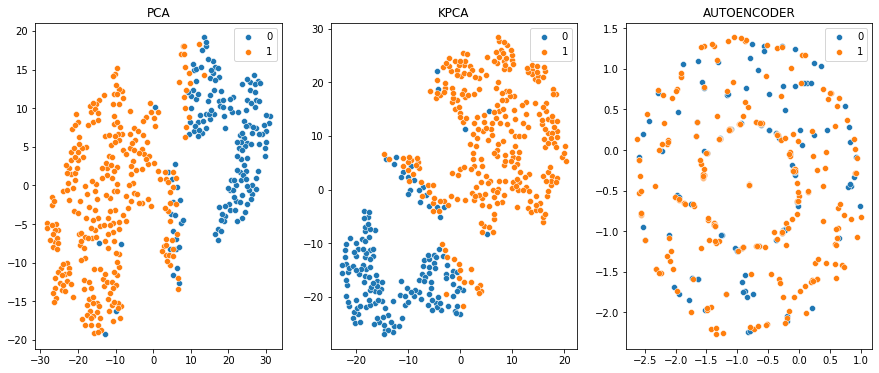

In [12]:
#Visualize the reduced subspace in 2 dimensions and colour the samples with the labels, one visualization for PCA and one for kPCA

#Visualization for PCA and kPCA
f, ax = plt.subplots(1,3)
f.set_size_inches(15,6)

sns.scatterplot(x = xtr_pca_tsne[(ytr).ravel() == 0,0], y = xtr_pca_tsne[ytr.ravel() == 0,1], ax= ax[0], legend='full', label = '0')
sns.scatterplot(x = xtr_pca_tsne[ytr.ravel() == 1,0], y = xtr_pca_tsne[ytr.ravel() == 1,1], ax= ax[0], legend='full', label = '1')
ax[0].set_title("PCA")
sns.scatterplot(x = xtr_kpca_tsne[(ytr).ravel() == 0,0], y = xtr_kpca_tsne[ytr.ravel() == 0,1], ax= ax[1], legend='full', label = '0')
sns.scatterplot(x = xtr_kpca_tsne[ytr.ravel() == 1,0], y = xtr_kpca_tsne[ytr.ravel() == 1,1], ax= ax[1], legend='full', label = '1')
ax[1].set_title("KPCA")
sns.scatterplot(x = xtr_ae_tsne[(ytr).ravel() == 0,0], y = xtr_ae_tsne[ytr.ravel() == 0,1], ax= ax[2], legend='full', label = '0')
sns.scatterplot(x = xtr_ae_tsne[ytr.ravel() == 1,0], y = xtr_ae_tsne[ytr.ravel() == 1,1], ax= ax[2], legend='full', label = '1')
ax[2].set_title("AUTOENCODER")

plt.show()

In [13]:
# Create a vector with the results
results_df = pd.DataFrame(columns=['Model','Dimensionality reduction','Components','Explained variance','Accuracy'])

In [14]:
#within train set perform classification with SVM and Logistic Regression (check scikit learn toolkit). 
#Select the best hyperparameters of the models by using cross-validation (check GridSearchCV method on scikit learn).

#SVC

param_grid = {'C':  np.logspace(-4, 4, 50),
              'kernel': ['linear', 'rbf'],
              'gamma' :np.logspace(-4, 4, 50)}
svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search_svc.fit(xtr_sc, ytr)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_svc.best_params_}")

# Get the best model
best_model_svc = grid_search_svc.best_estimator_

# Apply the best model to the test data
y_pred_svc = best_model_svc.predict(xte_sc)

# Calculate the accuracy of the predictions
accuracy_svc = best_model_svc.score(xte_sc, yte)
print(f"Test accuracy: {accuracy_svc:.3f}")


Best hyperparameters: {'C': 2.559547922699533, 'gamma': 1.2067926406393288, 'kernel': 'rbf'}
Test accuracy: 0.974


In [15]:
#Save result
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':None,
                               'Components':None,
                               'Accuracy': accuracy_svc},ignore_index=True)


In [16]:
#LR

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1,10, 100, 1000],
 'penalty': ['l1', 'l2'],
 'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

# Initialize the logistic regression model
lr = LogisticRegression()

# Initialize the grid search object
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search_lr.fit(xtr_sc, ytr)
# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search_lr.best_params_}")

# Get the best model
best_model_lr = grid_search_lr.best_estimator_

# Apply the best model to the test data
y_pred_lr = best_model_lr.predict(xte_sc)

# Calculate the accuracy of the predictions
accuracy_lr = best_model_lr.score(xte_sc, yte)
print(f"Test accuracy: {accuracy_lr:.3f}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
Test accuracy: 0.982


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
#Save result
results_df = results_df.append({'Model':'Logistic Regression with CV',
                               'Dimensionality reduction':None,
                               'Components':None,
                               'Accuracy': accuracy_lr},ignore_index=True)


In [18]:
#Transform the test set with the dimension reduction learned in the first step. 
#Then apply the learned classification function of the previous step. 


    
#svc with pca 
svc2=best_model_svc
svc2.fit(xtr_pca_2, ytr)
pred_svc2_pca_2 = svc2.predict(xte_pca_2)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':2,
                               'Accuracy': accuracy_score(yte, pred_svc2_pca_2),
                               'Explained variance':np.sum(pca_2.explained_variance_ratio_)
                               },ignore_index=True)

svc2=best_model_svc
svc2.fit(xtr_pca_4, ytr)
pred_svc2_pca_4 = svc2.predict(xte_pca_4)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':4,
                               'Accuracy': accuracy_score(yte, pred_svc2_pca_4),
                               'Explained variance':np.sum(pca_4.explained_variance_ratio_)
                               },ignore_index=True)

svc2=best_model_svc
svc2.fit(xtr_pca_6, ytr)
pred_svc2_pca_6 = svc2.predict(xte_pca_6)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':6,
                               'Accuracy': accuracy_score(yte, pred_svc2_pca_6),
                               'Explained variance':np.sum(pca_6.explained_variance_ratio_)
                               },ignore_index=True)


#svc with kpca 

svc2=best_model_svc   
svc2.fit(xtr_kpca_2, ytr)
pred_svc2_kpca_2 = svc2.predict(xte_kpca_2)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':2,
                               'Accuracy': accuracy_score(yte, pred_svc2_kpca_2),
                               'Explained variance': None
                               },ignore_index=True)
svc2=best_model_svc
svc2.fit(xtr_kpca_4, ytr)
pred_svc2_pca_4 = svc2.predict(xte_pca_4)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':4,
                               'Accuracy': accuracy_score(yte, pred_svc2_pca_4),
                               'Explained variance': None
                               },ignore_index=True)
svc2=best_model_svc
svc2.fit(xtr_pca_6, ytr)
pred_svc2_pca_6 = svc2.predict(xte_pca_6)
results_df = results_df.append({'Model':'SVM with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':6,
                               'Accuracy': accuracy_score(yte, pred_svc2_pca_6),
                               'Explained variance': None
                               },ignore_index=True)


In [19]:
#Transform the test set with the dimension reduction learned in the first step. 
#Then apply the learned classification function of the previous step. 

    
#lr with pca 
lr2=best_model_lr
lr2.fit(xtr_pca_2, ytr)
pred_lr2_pca_2 = lr2.predict(xte_pca_2)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':2,
                               'Accuracy': lr2.score(xte_pca_2, yte),
                               'Explained variance':None
                               },ignore_index=True)
lr2=best_model_lr
lr2.fit(xtr_pca_4, ytr)
pred_lr2_pca_4 = lr2.predict(xte_pca_4)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':4,
                               'Accuracy': lr2.score(xte_pca_4, yte),
                               'Explained variance':None
                               },ignore_index=True)

lr2=best_model_lr
lr2.fit(xtr_pca_6, ytr)
pred_lr2_pca_6 = lr2.predict(xte_pca_6)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'PCA',
                               'Components':6,
                               'Accuracy': lr2.score(xte_pca_6, yte),
                               'Explained variance':None
                               },ignore_index=True)






#LR with kpca 
lr2=best_model_lr
lr2.fit(xtr_kpca_2, ytr)
pred_lr2_kpca_2 = lr2.predict(xte_kpca_2)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':2,
                               'Accuracy': lr2.score(xte_kpca_2, yte),
                               'Explained variance':None
                               },ignore_index=True)
lr2=best_model_lr
lr2.fit(xtr_kpca_4, ytr)
pred_lr2_kpca_4 = lr2.predict(xte_kpca_4)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':4,
                               'Accuracy': lr2.score(xte_kpca_4, yte),
                               'Explained variance':None
                               },ignore_index=True)
lr2=best_model_lr
lr2.fit(xtr_kpca_6, ytr)
pred_lr2_kpca_6 = lr2.predict(xte_kpca_6)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'KPCA',
                               'Components':6,
                               'Accuracy': lr2.score(xte_kpca_6, yte),
                               'Explained variance':None
                               },ignore_index=True)



#LR with kpca 
lr2=best_model_lr
lr2.fit(xlat_tr_2, ytr)
pred_lr2_ae_2 = lr2.predict(xlat_te_2)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'Autoencoder',
                               'Components':2,
                               'Accuracy': lr2.score(xlat_te_2, yte),
                               'Explained variance':None
                               },ignore_index=True)
lr2=best_model_lr
lr2.fit(xlat_tr_4, ytr)
pred_lr2_ae_4 = lr2.predict(xlat_te_4)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'Autoencoder',
                               'Components':4,
                               'Accuracy': lr2.score(xlat_te_4, yte),
                               'Explained variance':None
                               },ignore_index=True)
lr2=best_model_lr
lr2.fit(xlat_tr_6, ytr)
pred_lr2_ae_6 = lr2.predict(xlat_te_6)
results_df = results_df.append({'Model':'Logistic regression with CV',
                               'Dimensionality reduction':'Autoencoder',
                               'Components':6,
                               'Accuracy': lr2.score(xlat_te_6, yte),
                               'Explained variance':None
                               },ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [20]:
#Determine which model is the best based on evaluation metrics.
results_df.sort_values(by= 'Accuracy' ,ascending= False)

,Model,Dimensionality reduction,Components,Explained variance,Accuracy
3,SVM with CV,PCA,4,0.836167,1.000000
12,Logistic regression with CV,KPCA,4,None,0.991228
9,Logistic regression with CV,PCA,4,None,0.991228
13,Logistic regression with CV,KPCA,6,None,0.982456
4,SVM with CV,PCA,6,0.909016,0.982456
7,SVM with CV,KPCA,6,None,0.982456
1,Logistic Regression with CV,None,None,NaN,0.982456
0,SVM with CV,None,None,NaN,0.973684
10,Logistic regression with CV,PCA,6,None,0.973684
11,Logistic regression with CV,KPCA,2,None,0.973684


# **Conditions**
- the assignment is individual and personal. Each student must do it by their own.
- The methodology and results obtained must be written in a 2-3 pages report. 
#### **The report must include** 
- at least 3 cited papers.
- the following sections: Title, Abstract, Introduccion, Methods, Experiments, Discussion and Conclusions
- You are free to implement more methods like Neural Networks

# **Objectives for the assignment**
- make train-test-split (80% train , 20% test)
- within train set make dimension reduction with PCA and kPCA from D = x.shape[1] features to P = [2,4,6] latent dimensions.
- Visualize the reduced subspace in 2 dimensions and colour the samples with the labels, one visualization for PCA and one for kPCA.
- within train set perform classification with SVM and Logistic Regression (check scikit learn toolkit). Select the best hyperparameters of the models by using cross-validation (check GridSearchCV method on scikit learn).
- Transform the test set with the dimension reduction learned in the first step. Then apply the learned classification function of the previous step. Determine which model is the best based on evaluation metrics.
- compare the results of classification in latent space against the same classification in the original input space to measure if the latent space improves the classification task.
